In [ ]:
# Continuation of House Prices from HW1

In [9]:
# Import
import pandas as pd
import torch

train_40 = pd.read_csv("./data-from-hw1/train_40.csv")
test_40 = pd.read_csv("./data-from-hw1/test_40.csv")
prices = pd.read_csv('./data-from-hw1/train.csv')['SalePrice']
print(train_40.shape)

(1460, 40)


In [93]:
# Split training set into training and validation
from sklearn.model_selection import train_test_split

train_X, val_X, train_Y, val_Y = train_test_split(
    train_40, prices, test_size=0.3, random_state=42, shuffle=True
)
train_X.shape
train_X.head()

,OverallQual,Neighborhood,GrLivArea,YearBuilt,TotalBsmtSF,GarageArea,GarageCars,1stFlrSF,MSSubClass,ExterQual_TA,...,BsmtUnfSF,BsmtQual_Ex,OverallCond,BsmtFinType1_GLQ,GarageFinish_Fin,GarageType_Detchd,WoodDeckSF,Foundation_CBlock,HeatingQC_TA,YrSold
135,0.666667,0.378134,0.253956,0.710145,0.213421,0.373766,0.50,0.309316,0.000000,1.0,...,0.558219,0.0,0.625,0.0,0.0,0.0,0.114352,0.0,0.0,0.50
1452,0.444444,0.119470,0.139035,0.963768,0.089525,0.370240,0.50,0.169344,0.941176,1.0,...,0.000000,0.0,0.500,1.0,1.0,0.0,0.000000,0.0,0.0,0.00
762,0.666667,0.532616,0.228523,0.992754,0.123732,0.433004,0.50,0.098669,0.235294,1.0,...,0.313356,0.0,0.500,1.0,0.0,0.0,0.197200,0.0,0.0,1.00
932,0.888889,0.532616,0.295968,0.971014,0.311784,0.555712,0.75,0.360486,0.000000,0.0,...,0.815497,1.0,0.500,0.0,1.0,0.0,0.000000,0.0,0.0,0.25
435,0.666667,0.416045,0.250000,0.898551,0.130769,0.387870,0.50,0.113125,0.235294,0.0,...,0.029966,0.0,0.625,1.0,0.0,0.0,0.184364,0.0,0.0,0.75


In [130]:
# Define model class as linear regression
# y = xW + b
W = torch.randn(40, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
train_X_tensor = torch.tensor(train_X.values, dtype = torch.float32)
train_Y_tensor = torch.tensor(train_Y.to_numpy().reshape(-1, 1), dtype=torch.float32)

In [131]:
# Define one autodiff/update loop
def update_once(learning_rate, reg_param, W, b):
    prices_predicted = train_X_tensor @ W + b
    loss = torch.mean((prices_predicted - train_Y_tensor)**2) + (reg_param / 2) * torch.sum(W**2)
    loss.backward()
    with torch.no_grad():  # disables autograd temporarily
        W.data -= learning_rate * W.grad
        b.data -= learning_rate * b.grad

    W.grad.zero_()
    b.grad.zero_()
    return loss.item(), W, b

In [134]:
# Define how many updates
def update_N(learning_rate, reg_param, num_epochs, W, b):
    W = torch.randn(40, 1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    for i in range(num_epochs):
        loss, W, b = update_once(learning_rate, reg_param, W, b)
        if i % 50 == 0:
            print(f"Epoch {i+1}, Loss: {loss}, W norm: {torch.norm(W).item()}")
    return W, b

In [139]:
# Try some hyperparameters
update_N(0.1, 0.1, 200, W, b)
print("train_X shape:", train_X_tensor.shape)
print("W shape:", W.shape)
print("b shape:", b.shape)
print("train_Y shape:", train_Y_tensor.shape)

Epoch 1, Loss: 38896418816.0, W norm: 99414.09375
Epoch 51, Loss: 1962281216.0, W norm: 94865.5859375
Epoch 101, Loss: 1888349568.0, W norm: 103256.796875
Epoch 151, Loss: 1869787648.0, W norm: 105281.5625
train_X shape: torch.Size([1022, 40])
W shape: torch.Size([40, 1])
b shape: torch.Size([1])
train_Y shape: torch.Size([1022, 1])


In [146]:
# Create a lot of models with different regularization parameters
reg_params = [0,1e-8,1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1]
model_params = []
for reg in reg_params:
    model_params.append(update_N(0.1, reg, 751, W, b))

Epoch 1, Loss: 38892302336.0, W norm: 99412.375
Epoch 51, Loss: 1368942080.0, W norm: 107956.0859375
Epoch 101, Loss: 1140912640.0, W norm: 131148.640625
Epoch 151, Loss: 1064404992.0, W norm: 144762.390625
Epoch 201, Loss: 1028435648.0, W norm: 153626.84375
Epoch 251, Loss: 1007280576.0, W norm: 159979.28125
Epoch 301, Loss: 993184384.0, W norm: 164901.125
Epoch 351, Loss: 983115072.0, W norm: 168929.390625
Epoch 401, Loss: 975595648.0, W norm: 172346.53125
Epoch 451, Loss: 969792384.0, W norm: 175313.46875
Epoch 501, Loss: 965193088.0, W norm: 177930.46875
Epoch 551, Loss: 961464832.0, W norm: 180265.46875
Epoch 601, Loss: 958382464.0, W norm: 182367.65625
Epoch 651, Loss: 955790272.0, W norm: 184274.53125
Epoch 701, Loss: 953576832.0, W norm: 186015.59375
Epoch 751, Loss: 951662080.0, W norm: 187614.640625
Epoch 1, Loss: 38892294144.0, W norm: 99412.2734375
Epoch 51, Loss: 1368950144.0, W norm: 107955.4921875
Epoch 101, Loss: 1140915200.0, W norm: 131148.203125
Epoch 151, Loss: 1064

In [147]:
# Test each model on validation set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE_scores = []
r2_scores = []
for W, b in model_params:
    predicted_val_Y = val_X.to_numpy() @ W.detach().numpy() + b.detach().numpy()
    MSE_scores.append(mean_squared_error(val_Y, predicted_val_Y))
    r2_scores.append(r2_score(val_Y, predicted_val_Y))
print(val_Y.shape, predicted_val_Y.shape)


(438,) (438, 1)


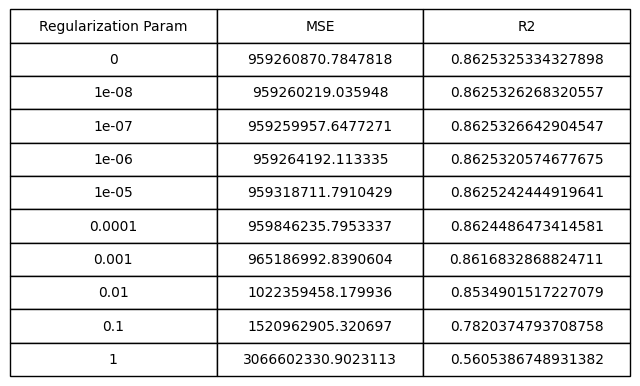

In [148]:
# Visualize metrics
import matplotlib.pyplot as plt

# This is adapted code from HW1
# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "how do i create a table"
models_names = reg_params
mses = MSE_scores
r2s = r2_scores

table_data = list(zip(models_names, mses, r2s))
fig, ax = plt.subplots(figsize=(8,3))
ax.axis('off')  # hide axes

# Create the table
table = ax.table(cellText=table_data,
                 colLabels=['Regularization Param', 'MSE', 'R2'],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(True)
table.scale(1, 2) 
plt.show()

In [157]:
# Compare to sklearn
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(train_X, train_Y)
print("Sklearn R2:", sk_model.score(val_X, val_Y))

Sklearn R2: 0.8678334659150575


In [150]:
# Try some more regularization parameters
reg_params = [1e-8, 2.5e-8,5e-8,7.5e-8,1e-7,2.5e-7,5e-7,7.5e-7,1e-6]
model_params = []
for reg in reg_params:
    model_params.append(update_N(0.1, reg, 751, W, b))

Epoch 1, Loss: 38893355008.0, W norm: 99412.2734375
Epoch 51, Loss: 1368939648.0, W norm: 107955.7421875
Epoch 101, Loss: 1140908800.0, W norm: 131148.640625
Epoch 151, Loss: 1064402176.0, W norm: 144762.515625
Epoch 201, Loss: 1028433920.0, W norm: 153626.984375
Epoch 251, Loss: 1007279424.0, W norm: 159979.40625
Epoch 301, Loss: 993183552.0, W norm: 164901.234375
Epoch 351, Loss: 983114560.0, W norm: 168929.5
Epoch 401, Loss: 975595072.0, W norm: 172346.625
Epoch 451, Loss: 969792128.0, W norm: 175313.546875
Epoch 501, Loss: 965192832.0, W norm: 177930.5625
Epoch 551, Loss: 961464768.0, W norm: 180265.53125
Epoch 601, Loss: 958382208.0, W norm: 182367.734375
Epoch 651, Loss: 955790016.0, W norm: 184274.59375
Epoch 701, Loss: 953576832.0, W norm: 186015.640625
Epoch 751, Loss: 951661888.0, W norm: 187614.703125
Epoch 1, Loss: 38891749376.0, W norm: 99412.1953125
Epoch 51, Loss: 1368934400.0, W norm: 107956.609375
Epoch 101, Loss: 1140910720.0, W norm: 131148.96875
Epoch 151, Loss: 106

In [152]:
# Define reusable compute and graph function
def compute_and_graph_scores():
    MSE_scores = []
    r2_scores = []
    for W, b in model_params:
        predicted_val_Y = val_X.to_numpy() @ W.detach().numpy() + b.detach().numpy()
        MSE_scores.append(mean_squared_error(val_Y, predicted_val_Y))
        r2_scores.append(r2_score(val_Y, predicted_val_Y))
    print(val_Y.shape, predicted_val_Y.shape)
    # This is adapted code from HW1
    # Adapted from code generated by ChatGPT (OpenAI, 2025)
    # Prompt: "how do i create a table"
    models_names = reg_params
    mses = MSE_scores
    r2s = r2_scores

    table_data = list(zip(models_names, mses, r2s))
    fig, ax = plt.subplots(figsize=(8,3))
    ax.axis('off')  # hide axes

    # Create the table
    table = ax.table(cellText=table_data,
                 colLabels=['Regularization Param', 'MSE', 'R2'],
                 cellLoc='center',
                 loc='center')

    table.auto_set_font_size(True)
    table.scale(1, 2) 
    plt.show()

(438,) (438, 1)


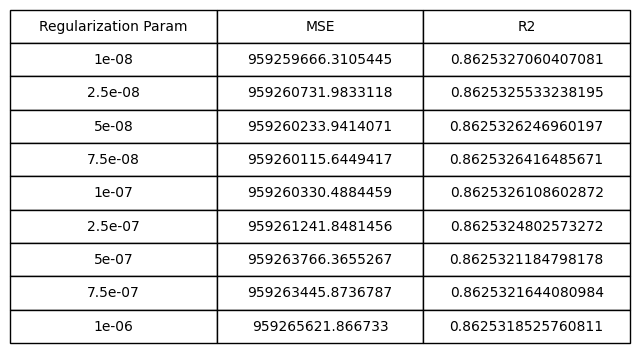

In [153]:
# Compute and graph scores
compute_and_graph_scores()

In [162]:
# Compare best SKLearn and autograd
print("Sklearn R2:", sk_model.score(val_X, val_Y))
print("Autograd R2:", max(r2_scores))
print("Sklearn MSE:", mean_squared_error(val_Y, sk_model.predict(val_X)))
print("Autograd MSE:", min(MSE_scores))

Sklearn R2: 0.8678334659150575
Autograd R2: 0.8625327060407081
Sklearn MSE: 922270466.9031091
Autograd MSE: 959259666.3105445
